In [4]:
import csv
csvarchivo = open('Datos2000.csv',encoding="utf8",errors='ignore')
entrada = csv.reader(csvarchivo, delimiter=";")
filas = []#filas de datos
expor = 1 #o 2
impor = 4 # o 5
cantidad = 7

for i in entrada:
    if entrada.line_num == 1:
        columnas = i
    else:
        filas.append(i)


In [5]:
tuplas = []
i = 1
for fila in filas:
    cant = float(fila[4])
    if cant != 0.0:
        pais1 = fila[1].replace(",", "")
        pais2 = fila[3].replace(",", "")
        par = [pais1, pais2, cant]
        tuplas.append(par)
    
print(tuplas)

[['Brazil', 'Netherlands Antilles', 13574477.0], ['Colombia', 'Netherlands Antilles', 18693.0], ['Mexico', 'Netherlands Antilles', 866462080.0], ['United States', 'Netherlands Antilles', 3506.0], ['Venezuela', 'Netherlands Antilles', 1537824512.0], ['United States', 'Antigua and Barbuda', 10087.0], ['Azerbaijan', 'Austria', 22013808.0], ['Cameroon', 'Austria', 4836066.0], ['Czechia', 'Austria', 3590860.0], ['Germany', 'Austria', 28864700.0], ['Algeria', 'Austria', 132968256.0], ['France', 'Austria', 195023.0], ['Iraq', 'Austria', 264572944.0], ['Kazakstan', 'Austria', 231609968.0], ['Libyan Arab Jamahiriya', 'Austria', 149437664.0], ['Nigeria', 'Austria', 192707168.0], ['Russia Federation', 'Austria', 83728968.0], ['Saudi Arabia', 'Austria', 80492368.0], ['Syrian Arab Republic', 'Austria', 49816004.0], ['Turkmenistan', 'Austria', 9172110.0], ['Yemen', 'Austria', 4251412.0], ['Cuba', 'Belgium', 464368.0], ['Germany', 'Belgium', 5458796.0], ['Estonia', 'Belgium', 10493504.0], ['France', 

In [6]:
# lo escribimos en un fichero   
with open('ficheroNUEVO2000.txt', 'w') as f:
    for tupla in tuplas:
        fila = tupla[0] + "," +tupla[1] + "," + str(tupla[2]) + "\n"
        f.write(fila)
        
csvarchivo.close()

In [2]:
import networkx as nx  #visualize
G = nx.read_edgelist('ficheroNUEVO2000.txt',  delimiter=",", data=[('Dinero', float)], create_using=nx.DiGraph)

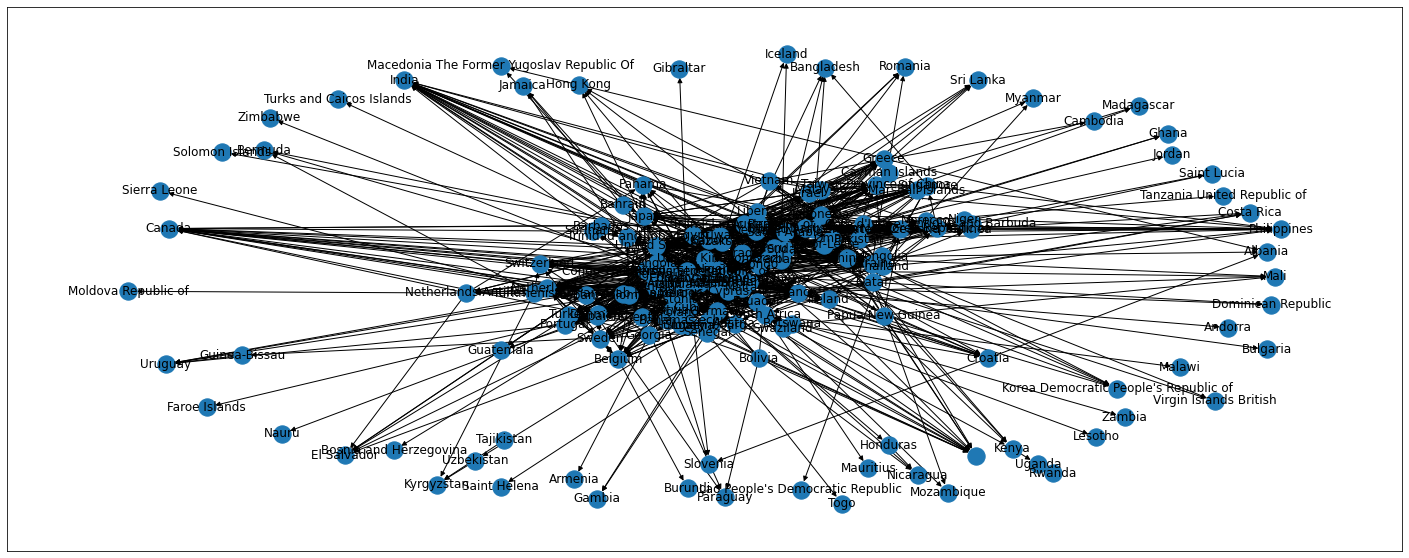

In [13]:
import networkx as nx  #visualize
import matplotlib.pyplot as plt 

plt.figure(figsize=(25,10))
nx.draw_networkx(G)
plt.show();

In [10]:
import operator
# Mostramos el numero de nodos, aristas y el grado medio
N = G.number_of_nodes()
print('Número de nodos:', N)
L = G.number_of_edges()
print('Número de aristas:',L)
g_medio = 2 * L / N
print('Grado medio:',g_medio)
print("El camino minimo medio: ", "NO HAY PORQUE NO ES CONEXO")
#print('Grado de clustering: ', nx.average_clustering(G))
#print("Componentes conexas: ", nx.number_connected_components(G))

print("\n")
# Centralidad de grado
gCentral = nx.out_degree_centrality(G)     
print("Los 5 nodos con el indice de centralidad de grado de salida mas alto")        
ordenado1 = sorted(gCentral.items(), key=operator.itemgetter(1), reverse=True)
print(ordenado1[0])
print(ordenado1[1])
print(ordenado1[2])
print(ordenado1[3])
print(ordenado1[4])
print("-------------")

# Centralidad de grado
gCentral = nx.in_degree_centrality(G)     
print("Los 5 nodos con el indice de centralidad de grado de entrada mas alto")        
ordenado1 = sorted(gCentral.items(), key=operator.itemgetter(1), reverse=True)
print(ordenado1[0])
print(ordenado1[1])
print(ordenado1[2])
print(ordenado1[3])
print(ordenado1[4])
print("-------------")
print("\n")

Número de nodos: 167
Número de aristas: 940
Grado medio: 11.25748502994012
El camino minimo medio:  NO HAY PORQUE NO ES CONEXO


Los 5 nodos con el indice de centralidad de grado de salida mas alto
('Russia Federation', 0.28915662650602414)
('Nigeria', 0.23493975903614459)
('United States', 0.18674698795180725)
('Venezuela', 0.18674698795180725)
('Kazakstan', 0.1746987951807229)
-------------
Los 5 nodos con el indice de centralidad de grado de entrada mas alto
('United States', 0.23493975903614459)
('France', 0.20481927710843376)
('China', 0.1927710843373494)
('Italy', 0.1927710843373494)
('Spain', 0.16867469879518074)
-------------




In [9]:
import operator
# Centralidad de intermediación
print("Los 5 nodos con el indice de centralidad de intermediacion mas alto")
btwnCent = nx.betweenness_centrality(G)
ordenado2 = sorted(btwnCent.items(), key=operator.itemgetter(1), reverse=True)
print(ordenado2[0])
print(ordenado2[1])
print(ordenado2[2])
print(ordenado2[3])
print(ordenado2[4])


Los 5 nodos con el indice de centralidad de intermediacion mas alto
('United States', 0.13696318729189866)
('China', 0.11416425462314193)
('Russia Federation', 0.08888094400861321)
('Germany', 0.07990779191855137)
('France', 0.06076835407060591)


In [11]:
import operator
# Centralidad de cercanía
closeCent = nx.closeness_centrality(G)
ordenado3 = sorted(closeCent.items(), key=operator.itemgetter(1), reverse=True)
print("Los 5 nodos con el indice de centralidad de cercania mas alto")
print(ordenado3[0])
print(ordenado3[1])
print(ordenado3[2])
print(ordenado3[3])
print(ordenado3[4])
print("-------------")
print("\n")

Los 5 nodos con el indice de centralidad de cercania mas alto
('United States', 0.35604713937718085)
('France', 0.32742023369861356)
('Italy', 0.324162320925493)
('Netherlands', 0.31783720246841024)
('China', 0.31629430342730147)
-------------




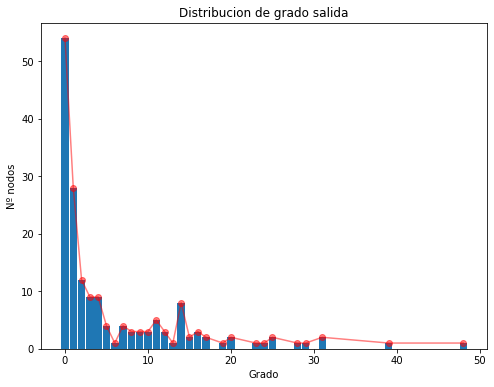

In [14]:
 import collections
# Pintamos la grafica de distribucion de grado de SALIDA
distrib = []
for nodo, deg in G.out_degree():
    distrib.append(deg)
deg_cnt = collections.Counter(sorted(distrib))
deg, cnt = zip(*deg_cnt.items())
cnt = tuple([x for x in cnt])
plt.figure(figsize=(8,6))
plt.bar(deg, cnt, width=0.9)
plt.plot(deg, cnt, marker='o', color='red', alpha=0.5)

plt.title("Distribucion de grado salida")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

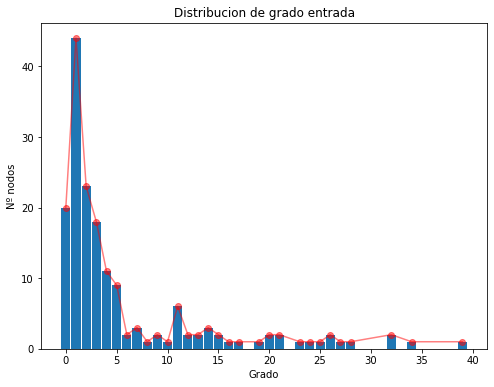

In [15]:
# Pintamos la grafica de distribucion de grado de ENTRADA
distrib = []
for nodo, deg in G.in_degree():
    distrib.append(deg)
deg_cnt = collections.Counter(sorted(distrib))
deg, cnt = zip(*deg_cnt.items())
cnt = tuple([x for x in cnt])
plt.figure(figsize=(8,6))
plt.bar(deg, cnt, width=0.9)
plt.plot(deg, cnt, marker='o', color='red', alpha=0.5)

plt.title("Distribucion de grado entrada")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

In [2]:
print("Paises con los que comercia Venezuela en el 2000")
vecinos = G.neighbors('Venezuela')
cont = 0
for i in vecinos:
    cont += 1
    print(i)
print(cont, " paises en total")

Paises con los que comercia Venezuela en el 2000
Netherlands Antilles
Belgium
Bahamas
Brazil
Canada
Chile
Colombia
Costa Rica
Cuba
Germany
Ecuador
Spain
France
United Kingdom
Guatemala
India
Italy
Netherlands
Panama
Peru
El Salvador
Sweden
Trinidad and Tobago
Cote d'Ivoire
Uruguay
Dominican Republic
Saint Lucia

Aruba
Jamaica
Nicaragua
31  paises en total


In [7]:
vecinos = G.neighbors('United Arab Emirates')
cont = 0
for i in vecinos:
    cont += 1
print("En el año 2000 Paises Bajos comercio con: ", cont, " paises en total")

En el año 2000 Paises Bajos comercio con:  20  paises en total
